In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA

In [2]:
df_final = pd.read_csv('Data/Final_NBA_Seasons1-3_1977_final.csv', index_col = 0)
df_final.set_index('Player', inplace = True)

In [5]:
cols = ['GS','MP','FG','FGA','2P','2PA','FT','FTA','ORB','DRB','TRB','AST','STL','TOV','PTS','roy','all_rookie_1','WS_1','G_1','GS_1','MP_1','FG_1','FGA_1','2P_1',
        '2PA_1','3P_1','3PA_1','FT_1','FTA_1','ORB_1','DRB_1','TRB_1','AST_1','STL_1','BLK_1','TOV_1','PF_1','PTS_1','FG%_1','ppg_1','apg_1','rpg_1','spg_1','bpg_1',
        'tpg_1','ftpg_1','PER_1','OWS_1','DWS_1','WS/48_1','OBPM_1','DBPM_1','BPM_1','VORP_1','WS_2','G_2','GS_2','MP_2','FG_2','FGA_2','2P_2','2PA_2','3P_2','3PA_2',
        'FT_2','FTA_2','ORB_2','DRB_2','TRB_2','AST_2','STL_2','BLK_2','TOV_2','PF_2','PTS_2','ppg_2','apg_2','rpg_2','spg_2','bpg_2','tpg_2','ftpg_2','PER_2','USG%_2',
        'ORtg_2','DRtg_2','OWS_2','DWS_2','WS/48_2','OBPM_2','DBPM_2','BPM_2','VORP_2','WS_3','G_3','GS_3','MP_3','FG_3','FGA_3','2P_3','2PA_3','3P_3','3PA_3','FT_3',
        'FTA_3','ORB_3','DRB_3','TRB_3','AST_3','STL_3','BLK_3','TOV_3','PF_3','PTS_3','TS%_3','ppg_3','apg_3','rpg_3','spg_3','bpg_3','tpg_3','ftpg_3','PER_3','USG%_3',
        'ORtg_3','DRtg_3','OWS_3','DWS_3','WS/48_3','OBPM_3','DBPM_3','BPM_3','VORP_3','target',]

df = df_final[cols]

In [22]:
df = df.fillna(0)

In [91]:
all_nba = df[df['target'] == 1]
all_nba.index.to_list()

['Al Horford\\horfoal01',
 'Allen Iverson\\iversal01',
 "Amar'e Stoudemire\\stoudam01",
 'Andre Drummond\\drumman01',
 'Andrew Bogut\\bogutan01',
 'Anfernee Hardaway\\hardaan01',
 'Anthony Davis\\davisan02',
 'Antonio McDyess\\mcdyean01',
 'Baron Davis\\davisba01',
 'Bernard King\\kingbe01',
 'Blake Griffin\\griffbl01',
 'Brad Daugherty\\daughbr01',
 'Brandon Roy\\roybr01',
 'Carlos Boozer\\boozeca01',
 'Carmelo Anthony\\anthoca01',
 'Charles Barkley\\barklch01',
 'Chris Bosh\\boshch01',
 'Chris Mullin\\mullich01',
 'Chris Paul\\paulch01',
 'Chris Webber\\webbech01',
 'Clyde Drexler\\drexlcl01',
 'Dale Ellis\\ellisda01',
 'Damian Lillard\\lillada01',
 'David Robinson\\robinda01',
 'DeMarcus Cousins\\couside01',
 'Dennis Rodman\\rodmade01',
 'Deron Williams\\willide01',
 'Derrick Coleman\\colemde01',
 'Dirk Nowitzki\\nowitdi01',
 'Dominique Wilkins\\wilkido01',
 'Draymond Green\\greendr01',
 'Dwight Howard\\howardw01',
 'Dwyane Wade\\wadedw01',
 'Eddie Jones\\jonesed02',
 'Fat Lever\\le

In [40]:
X = df.drop(columns = 'target')
y = df['target']

X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size= .8, random_state= 42)

### PCA

In [43]:
pca = PCA(n_components= .9, random_state=42)

pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)

In [44]:
pca.n_components_

2

In [34]:
pca_result = pca.fit_transform(X_train)
pca1 = pca_result[:,0]
pca2 = pca_result[:,1] 


target = pd.Categorical(y_train).codes

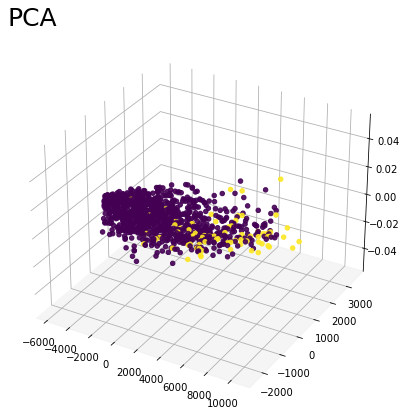

In [36]:
fig = plt.figure(figsize=(19, 7))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title('PCA', fontsize=25, loc='left')
ax.scatter(xs=pca1, 
           ys=pca2, 
#            zs=pca3, 
           c=target,
           alpha=.9,)

ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
# ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))


In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, classification_report, make_scorer
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import tree 
from xgboost import XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier, Booster
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, confusion_matrix,\
recall_score, precision_score, accuracy_score, log_loss,\
roc_curve, roc_auc_score, classification_report,plot_confusion_matrix
from sklearn.feature_selection import RFE, RFECV


In [98]:
RF = RandomForestClassifier(random_state = 42)
rfe = RFECV(estimator = DT, step =1, cv = 3, scoring = 'recall', n_jobs = -1, verbose = 1)
rfe = rfe.fit(X_train, y_train)
# print summaries for the selection of attributes
print(rfe.support_)
print(rfe.ranking_)


Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
Fitting estimator with 115 features.
Fitting estimator with 114 features.
Fitting estimator with 113 features.
Fitting estimator with 112 features.
Fitting estimator with 111 features.
Fitting estimator with 110 features.
Fitting estimator with 109 features.
Fitting estimator with 108 features.
Fitting estimator with 107 features.
F

In [ ]:
selected_rfe = X_train[rfe_features].columns[selector.support_]

In [100]:
feat_import = {name: score 
                   for name, score 
                               in zip(X_test.columns, RF.feature_importances_)}
feat_import

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [70]:
# create function to call for evaluation of each model

def metrics_score(train_preds, y_train, test_preds, y_test):
    print(f"Training Accuracy:\t{accuracy_score(y_train, train_preds):.4}",
          f"\tTesting Accuracy:\t{accuracy_score(y_test, test_preds):.4}")
    print(f"Training Precision:\t{precision_score(y_train, train_preds, average='weighted'):.4}",
          f"\tTesting Precision:\t{precision_score(y_test, test_preds, average='weighted'):.4}")
    print(f"Training Recall:\t{recall_score(y_train, train_preds, average='weighted'):.4}",
          f"\tTesting Recall:\t\t{recall_score(y_test, test_preds, average='weighted'):.4}")
    print(f"Training F1:\t\t{f1_score(y_train, train_preds, average='weighted'):.4}",
          f"\tTesting F1:\t\t{f1_score(y_test, test_preds, average='weighted'):.4}")

In [101]:
rf_train_preds = rfe.predict(X_train)
rf_test_preds = rfe.predict(X_test)
metrics_score(rf_train_preds, y_train, rf_test_preds, y_test)

Training Accuracy:	1.0 	Testing Accuracy:	0.9412
Training Precision:	1.0 	Testing Precision:	0.9344
Training Recall:	1.0 	Testing Recall:		0.9412
Training F1:		1.0 	Testing F1:		0.9367


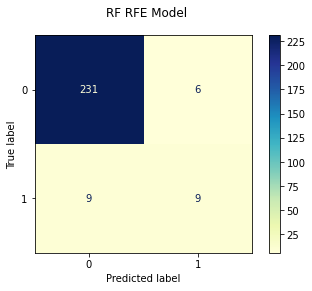

In [68]:
fig, ax = plt.subplots()

fig.suptitle("RF RFE Model")

plot_confusion_matrix(rfe, X_test, y_test, ax=ax, cmap="YlGnBu");

In [54]:
RF2 = RandomForestClassifier(random_state = 42)
RF2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [55]:
rf_train_preds = RF2.predict(X_train)
rf_test_preds = RF2.predict(X_test)
metrics_score(rf_train_preds, y_train, rf_test_preds, y_test)

Training Accuracy:	1.0 	Testing Accuracy:	0.9373
Training Precision:	1.0 	Testing Precision:	0.9312
Training Recall:	1.0 	Testing Recall:		0.9373
Training F1:		1.0 	Testing F1:		0.9336


In [81]:
knn = KNeighborsClassifier(n_neighbors=7, weights = 'distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [82]:

cross_val_score(knn, X_train, y_train, cv=5)

array([0.93137255, 0.92156863, 0.93137255, 0.9408867 , 0.93596059])

In [83]:
knn_train_preds = knn.predict(X_train)
knn_test_preds = knn.predict(X_test)
metrics_score(rf_train_preds, y_train, rf_test_preds, y_test)

Training Accuracy:	1.0 	Testing Accuracy:	0.949
Training Precision:	1.0 	Testing Precision:	0.9455
Training Recall:	1.0 	Testing Recall:		0.949
Training F1:		1.0 	Testing F1:		0.9469


In [84]:
df['target'].mean()

0.07069913589945012

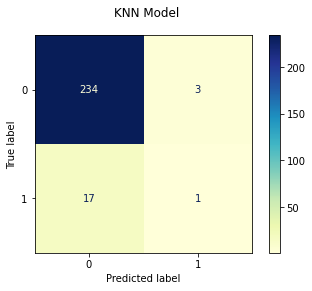

In [85]:
fig, ax = plt.subplots()

fig.suptitle("KNN Model")

plot_confusion_matrix(knn, X_test, y_test, ax=ax, cmap="YlGnBu");